## Начало лабораторной

Цены на кофе - https://www.kaggle.com/datasets/mayankanand2701/starbucks-stock-price-dataset

## Атрибуты

Date — Дата

Open — Открытие

High — Макс. цена

Low — Мин. цена

Close — Закрытие

Adj Close — Скорректированная цена закрытия

Volume — Объем торгов

## Бизнес-цели

__1. Оценка волатильности акций:__


Описание: Прогнозировать волатильность акций на основе изменений в ценах открытий, максимума, минимума и объема торгов.
Целевая переменная: Разница между высокой и низкой ценой (High - Low). (среднее значение)

__2. Прогнозирование цены закрытия акций:__


Описание: Оценить, какая будет цена закрытия акций Starbucks на следующий день или через несколько дней на основе исторических данных.
Целевая переменная: Цена закрытия (Close). (среднее значение)

## Определение достижимого уровня качества модели для первой задачи 

__Подготовка данных__

Загрузка данных и создание целевой переменной

In [1]:
import pandas as pd
from sklearn import set_config

# Установим параметры для вывода
set_config(transform_output="pandas")

# Загружаем набор данных
df = pd.read_csv(".//static//csv//Starbucks Dataset.csv")

# Устанавливаем случайное состояние
random_state = 42

# Рассчитываем среднее значение объема
average_volume = df['Volume'].mean()
print(f"Среднее значение поля 'Volume': {average_volume}")

# Создаем новую переменную, указывающую, превышает ли объем средний
df['above_average_volume'] = (df['Volume'] > average_volume).astype(int)

# Рассчитываем волатильность (разницу между высокими и низкими значениями)
df['volatility'] = df['High'] - df['Low']

# Выводим первые строки измененной таблицы для проверки
print(df.head())

Среднее значение поля 'Volume': 14704589.99726232
         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1992-06-26  0.328125  0.347656  0.320313  0.335938   0.260703  224358400   
1  1992-06-29  0.339844  0.367188  0.332031  0.359375   0.278891   58732800   
2  1992-06-30  0.367188  0.371094  0.343750  0.347656   0.269797   34777600   
3  1992-07-01  0.351563  0.359375  0.339844  0.355469   0.275860   18316800   
4  1992-07-02  0.359375  0.359375  0.347656  0.355469   0.275860   13996800   

   above_average_volume  volatility  
0                     1    0.027343  
1                     1    0.035157  
2                     1    0.027344  
3                     1    0.019531  
4                     0    0.011719  


#### Разделение набора данных на обучающую и тестовые выборки (80/20) для задачи классификации

Целевой признак -- above_average_close

In [2]:
from typing import Tuple
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split

def split_stratified_into_train_val_test(
    df_input,
    stratify_colname="y",
    frac_train=0.6,
    frac_val=0.15,
    frac_test=0.25,
    random_state=None,
) -> Tuple[DataFrame, DataFrame, DataFrame, DataFrame, DataFrame, DataFrame]:
   
    if frac_train + frac_val + frac_test != 1.0:
        raise ValueError(
            "fractions %f, %f, %f do not add up to 1.0"
            % (frac_train, frac_val, frac_test)
        )
    if stratify_colname not in df_input.columns:
        raise ValueError("%s is not a column in the dataframe" % (stratify_colname))
    X = df_input  # Contains all columns.
    y = df_input[
        [stratify_colname]
    ]  # Dataframe of just the column on which to stratify.
    # Split original dataframe into train and temp dataframes.
    df_train, df_temp, y_train, y_temp = train_test_split(
        X, y, stratify=y, test_size=(1.0 - frac_train), random_state=random_state
    )
    if frac_val <= 0:
        assert len(df_input) == len(df_train) + len(df_temp)
        return df_train, pd.DataFrame(), df_temp, y_train, pd.DataFrame(), y_temp
    # Split the temp dataframe into val and test dataframes.
    relative_frac_test = frac_test / (frac_val + frac_test)
    df_val, df_test, y_val, y_test = train_test_split(
        df_temp,
        y_temp,
        stratify=y_temp,
        test_size=relative_frac_test,
        random_state=random_state,
    )
    assert len(df_input) == len(df_train) + len(df_val) + len(df_test)
    return df_train, df_val, df_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = split_stratified_into_train_val_test(
    df, stratify_colname="above_average_volume", frac_train=0.80, frac_val=0, frac_test=0.20, random_state=random_state
)

display("X_train", X_train)
display("y_train", y_train)

display("X_test", X_test)
display("y_test", y_test)

'X_train'

Date       Open       High        Low      Close  Adj Close  \
7159  2020-11-27  98.480003  98.980003  98.279999  98.660004  91.604065   
4505  2010-05-14  13.630000  13.665000  13.090000  13.255000  10.329099   
421   1994-02-24   0.710938   0.726563   0.695313   0.699219   0.542626   
1595  1998-10-19   2.371094   2.425781   2.277344   2.324219   1.803701   
3676  2007-01-30  17.594999  17.680000  17.260000  17.280001  13.410076   
...          ...        ...        ...        ...        ...        ...   
5976  2016-03-18  59.910000  60.450001  59.430000  59.700001  50.562347   
1305  1997-08-25   2.542969   2.703125   2.539063   2.679688   2.079561   
6085  2016-08-23  56.169998  56.540001  56.000000  56.400002  48.101521   
5470  2014-03-17  37.404999  37.494999  36.910000  37.090000  30.569410   
5781  2015-06-10  51.799999  52.860001  51.660000  52.689999  44.214481   

        Volume  above_average_volume  volatility  
7159   2169700                     0    0.700004  
4505  23081800                     1    0.575000  
421    9264000                     0    0.031250  
1595  21284800                     1    0.148437  
3676  28372200                     1    0.420000  
...        ...                   ...         ...  
5976  14313600                     0    1.020001  
1305  28209600                     1    0.164062  
6085   7827900                     0    0.540001  
5470  11019800                     0    0.584999  
5781   8003600                     0    1.200001  

[6428 rows x 9 columns]

'y_train'

above_average_volume
7159                     0
4505                     1
421                      0
1595                     1
3676                     1
...                    ...
5976                     0
1305                     1
6085                     0
5470                     0
5781                     0

[6428 rows x 1 columns]

'X_test'

Date       Open       High        Low      Close  Adj Close  \
312   1993-09-21   0.746094   0.753906   0.726563   0.734375   0.569909   
6118  2016-10-10  53.529999  53.599998  53.270000  53.299999  45.457634   
1775  1999-07-08   3.132813   3.140625   3.046875   3.078125   2.388767   
6621  2018-10-09  56.830002  59.700001  56.810001  57.709999  51.257065   
4363  2009-10-20  10.390000  10.475000  10.190000  10.265000   7.966110   
...          ...        ...        ...        ...        ...        ...   
4472  2010-03-29  12.315000  12.385000  12.145000  12.305000   9.549243   
5944  2016-02-02  60.660000  60.900002  60.180000  60.700001  51.409283   
6839  2019-08-22  96.589996  96.849998  95.699997  96.489998  87.342232   
27    1992-08-05   0.425781   0.425781   0.402344   0.410156   0.318300   
3902  2007-12-20  10.075000  10.280000  10.025000  10.265000   7.966110   

        Volume  above_average_volume  volatility  
312    8051200                     0    0.027343  
6118   7224300                     0    0.329998  
1775  43104000                     1    0.093750  
6621  24855700                     1    2.890000  
4363  11845000                     0    0.285000  
...        ...                   ...         ...  
4472  13718000                     0    0.240000  
5944   9407400                     0    0.720002  
6839   5146200                     0    1.150001  
27     9516800                     0    0.023437  
3902  22996200                     1    0.255000  

[1608 rows x 9 columns]

'y_test'

above_average_volume
312                      0
6118                     0
1775                     1
6621                     1
4363                     0
...                    ...
4472                     0
5944                     0
6839                     0
27                       0
3902                     1

[1608 rows x 1 columns]

#### Формирование конвейера для классификации данных

preprocessing_num -- конвейер для обработки числовых данных: заполнение пропущенных значений и стандартизация

preprocessing_cat -- конвейер для обработки категориальных данных: заполнение пропущенных данных и унитарное кодирование

features_preprocessing -- трансформер для предобработки признаков

features_engineering -- трансформер для конструирования признаков

drop_columns -- трансформер для удаления колонок

pipeline_end -- основной конвейер предобработки данных и конструирования признаков

In [3]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

class StarbucksFeatures(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X["Length_to_Width_Ratio"] = X["x"] / X["y"]
        return X
    def get_feature_names_out(self, features_in):
        return np.append(features_in, ["Length_to_Width_Ratio"], axis=0)
    

columns_to_drop = ["Date"]
num_columns = ["Close", "Open", "Adj Close", "High", "Low", "Volume", "above_average_volume"]
cat_columns = []

num_imputer = SimpleImputer(strategy="median")
num_scaler = StandardScaler()
preprocessing_num = Pipeline(
    [
        ("imputer", num_imputer),
        ("scaler", num_scaler),
    ]
)

cat_imputer = SimpleImputer(strategy="constant", fill_value="unknown")
cat_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first")
preprocessing_cat = Pipeline(
    [
        ("imputer", cat_imputer),
        ("encoder", cat_encoder),
    ]
)

features_preprocessing = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("prepocessing_num", preprocessing_num, num_columns),
        ("prepocessing_cat", preprocessing_cat, cat_columns),
    ],
    remainder="passthrough"
)


drop_columns = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("drop_columns", "drop", columns_to_drop),
    ],
    remainder="passthrough",
)

features_postprocessing = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("prepocessing_cat", preprocessing_cat, ["Cabin_type"]),
    ],
    remainder="passthrough",
)

pipeline_end = Pipeline(
    [
        ("features_preprocessing", features_preprocessing),
        ("drop_columns", drop_columns),
    ]
)

__Демонстрация работы конвейера__

In [4]:
preprocessing_result = pipeline_end.fit_transform(X_train)
preprocessed_df = pd.DataFrame(
    preprocessing_result,
    columns=pipeline_end.get_feature_names_out(),
)

preprocessed_df

Close      Open  Adj Close      High       Low    Volume  \
7159  2.052122  2.047553   2.057055  2.035800  2.068394 -1.046507   
4505 -0.493609 -0.482248  -0.509368 -0.485819 -0.493841  0.708938   
421  -0.867869 -0.867429  -0.818396 -0.868235 -0.866632 -0.450983   
1595 -0.819432 -0.817932  -0.778575 -0.818012 -0.819050  0.558091   
3676 -0.373633 -0.364031  -0.412080 -0.367150 -0.368421  1.153036   
...        ...       ...        ...       ...       ...       ...   
5976  0.890812  0.897589   0.761079  0.896985  0.899914 -0.027099   
1305 -0.808836 -0.812807  -0.769864 -0.809815 -0.811178  1.139386   
6085  0.792446  0.786081   0.683373  0.781419  0.796750 -0.571535   
5470  0.216858  0.226603   0.129761  0.218514  0.222586 -0.303594   
5781  0.681859  0.655790   0.560632  0.672651  0.666218 -0.556786   

      above_average_volume  volatility  
7159             -0.733850    0.700004  
4505              1.362677    0.575000  
421              -0.733850    0.031250  
1595              1.362677    0.148437  
3676              1.362677    0.420000  
...                    ...         ...  
5976             -0.733850    1.020001  
1305              1.362677    0.164062  
6085             -0.733850    0.540001  
5470             -0.733850    0.584999  
5781             -0.733850    1.200001  

[6428 rows x 8 columns]

#### Формирование набора моделей для классификации

logistic -- логистическая регрессия

ridge -- гребневая регрессия

decision_tree -- дерево решений

knn -- k-ближайших соседей

naive_bayes -- наивный Байесовский классификатор

gradient_boosting -- метод градиентного бустинга (набор деревьев решений)

random_forest -- метод случайного леса (набор деревьев решений)

mlp -- многослойный персептрон (нейронная сеть)

In [5]:
from sklearn import ensemble, linear_model, naive_bayes, neighbors, neural_network, tree

class_models = {
    "logistic": {"model": linear_model.LogisticRegression()},
    # "ridge": {"model": linear_model.RidgeClassifierCV(cv=5, class_weight="balanced")},
    "ridge": {"model": linear_model.LogisticRegression(penalty="l2", class_weight="balanced")},
    "decision_tree": {
        "model": tree.DecisionTreeClassifier(max_depth=7, random_state=random_state)
    },
    "knn": {"model": neighbors.KNeighborsClassifier(n_neighbors=7)},
    "naive_bayes": {"model": naive_bayes.GaussianNB()},
    "gradient_boosting": {
        "model": ensemble.GradientBoostingClassifier(n_estimators=210)
    },
    "random_forest": {
        "model": ensemble.RandomForestClassifier(
            max_depth=11, class_weight="balanced", random_state=random_state
        )
    },
    "mlp": {
        "model": neural_network.MLPClassifier(
            hidden_layer_sizes=(7,),
            max_iter=500,
            early_stopping=True,
            random_state=random_state,
        )
    },
}

#### Обучение моделей на обучающем наборе данных и оценка на тестовом

In [6]:
import numpy as np
from sklearn import metrics

for model_name in class_models.keys():
    print(f"Model: {model_name}")
    model = class_models[model_name]["model"]

    model_pipeline = Pipeline([("pipeline", pipeline_end), ("model", model)])
    model_pipeline = model_pipeline.fit(X_train, y_train.values.ravel())

    y_train_predict = model_pipeline.predict(X_train)
    y_test_probs = model_pipeline.predict_proba(X_test)[:, 1]
    y_test_predict = np.where(y_test_probs > 0.5, 1, 0)

    class_models[model_name]["pipeline"] = model_pipeline
    class_models[model_name]["probs"] = y_test_probs
    class_models[model_name]["preds"] = y_test_predict

    class_models[model_name]["Precision_train"] = metrics.precision_score(
        y_train, y_train_predict
    )
    class_models[model_name]["Precision_test"] = metrics.precision_score(
        y_test, y_test_predict
    )
    class_models[model_name]["Recall_train"] = metrics.recall_score(
        y_train, y_train_predict
    )
    class_models[model_name]["Recall_test"] = metrics.recall_score(
        y_test, y_test_predict
    )
    class_models[model_name]["Accuracy_train"] = metrics.accuracy_score(
        y_train, y_train_predict
    )
    class_models[model_name]["Accuracy_test"] = metrics.accuracy_score(
        y_test, y_test_predict
    )
    class_models[model_name]["ROC_AUC_test"] = metrics.roc_auc_score(
        y_test, y_test_probs
    )
    class_models[model_name]["F1_train"] = metrics.f1_score(y_train, y_train_predict)
    class_models[model_name]["F1_test"] = metrics.f1_score(y_test, y_test_predict)
    class_models[model_name]["MCC_test"] = metrics.matthews_corrcoef(
        y_test, y_test_predict
    )
    class_models[model_name]["Cohen_kappa_test"] = metrics.cohen_kappa_score(
        y_test, y_test_predict
    )
    class_models[model_name]["Confusion_matrix"] = metrics.confusion_matrix(
        y_test, y_test_predict
    )

Model: logistic
Model: ridge
Model: decision_tree
Model: knn
Model: naive_bayes
Model: gradient_boosting
Model: random_forest
Model: mlp


#### Сводная таблица оценок качества для использованных моделей классификации

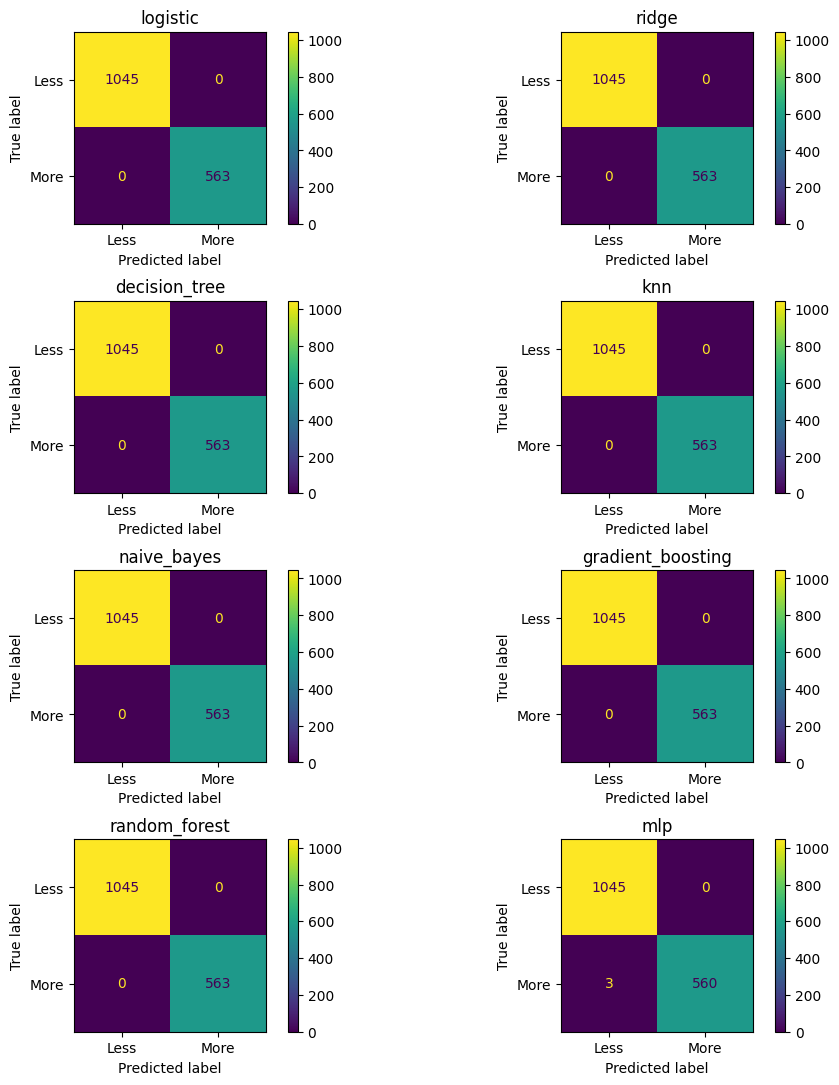

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

_, ax = plt.subplots(int(len(class_models) / 2), 2, figsize=(12, 10), sharex=False, sharey=False)
for index, key in enumerate(class_models.keys()):
    c_matrix = class_models[key]["Confusion_matrix"]
    disp = ConfusionMatrixDisplay(
        confusion_matrix=c_matrix, display_labels=["Less", "More"]
    ).plot(ax=ax.flat[index])
    disp.ax_.set_title(key)

plt.subplots_adjust(top=1, bottom=0, hspace=0.4, wspace=0.1)
plt.show()

1045: Это количество истинных положительных диагнозов (True Positives), где модель правильно определила объекты как "More".

563: Это количество ложных отрицательных диагнозов (False Negatives), где модель неправильно определила объекты, которые на самом деле принадлежат к классу "More", отнесёнными к классу "Less".

Исходя из значений True Positives и False Negatives, можно сказать, что модель имеет высокую точность при предсказании класса "More". Однако, высокий уровень ложных отрицательных результатов (563) указывает на то, что существует значительное количество примеров, которые модель пропускает. Это может означать, что в некоторых случаях она не распознаёт объекты, которые должны быть классифицированы как "More".


Точность, полнота, верность (аккуратность), F-мера

In [8]:
class_metrics = pd.DataFrame.from_dict(class_models, "index")[
    [
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
        "Accuracy_train",
        "Accuracy_test",
        "F1_train",
        "F1_test",
    ]
]
class_metrics.sort_values(
    by="Accuracy_test", ascending=False
).style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=["Accuracy_train", "Accuracy_test", "F1_train", "F1_test"],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
    ],
)

Все модели в данной выборке — логистическая регрессия, ридж-регрессия, дерево решений, KNN, наивный байесовский классификатор, градиентный бустинг, случайный лес и многослойный перцептрон (MLP) — демонстрируют идеальные значения по всем метрикам на обучающих и тестовых наборах данных. Это достигается, поскольку все модели показали значения, равные 1.0 для Precision, Recall, Accuracy и F1-меры, что указывает на то, что модель безошибочно классифицирует все примеры.

Модель MLP, хотя и имеет немного более низкие значения Recall (0.994) и F1-на тестовом наборе (0.997) по сравнению с другими, по-прежнему остается высокоэффективной. Тем не менее, она не снижает показатели классификации до такого уровня, что может вызвать обеспокоенность, и остается на уровне, близком к идеальному.

ROC-кривая, каппа Коэна, коэффициент корреляции Мэтьюса

In [9]:
class_metrics = pd.DataFrame.from_dict(class_models, "index")[
    [
        "Accuracy_test",
        "F1_test",
        "ROC_AUC_test",
        "Cohen_kappa_test",
        "MCC_test",
    ]
]
class_metrics.sort_values(by="ROC_AUC_test", ascending=False).style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=[
        "ROC_AUC_test",
        "MCC_test",
        "Cohen_kappa_test",
    ],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Accuracy_test",
        "F1_test",
    ],
)

Все модели, включая логистическую регрессию, ридж-регрессию, дерево решений, KNN, наивный байесовский классификатор, градиентный бустинг и случайный лес, продемонстрировали идеальные значения по всем метрикам: Accuracy, F1, ROC AUC, Cohen's Kappa и MCC, достигнув максимальных значений, равных 1. Это подчеркивает их эффективность в контексте анализа и классификации данных.

Модель MLP, хотя и показала очень высокие результаты, несколько уступает конкурентам по показателям Accuracy (0.998) и F1 (0.997). Несмотря на это, она достигает оптимального значения ROC AUC (1.000), что указывает на ее способность к выделению классов. Показатели Cohen's Kappa (0.996) и MCC (0.996) также находятся на высоком уровне, что говорит о хорошей согласованности и строгости классификации.

In [10]:
best_model = str(class_metrics.sort_values(by="MCC_test", ascending=False).iloc[0].name)

display(best_model)

'logistic'

#### Вывод данных с ошибкой предсказания для оценки

In [11]:
preprocessing_result = pipeline_end.transform(X_test)
preprocessed_df = pd.DataFrame(
    preprocessing_result,
    columns=pipeline_end.get_feature_names_out(),
)

y_pred = class_models[best_model]["preds"]

error_index = y_test[y_test["above_average_volume"] != y_pred].index.tolist()
display(f"Error items count: {len(error_index)}")

error_predicted = pd.Series(y_pred, index=y_test.index).loc[error_index]
error_df = X_test.loc[error_index].copy()
error_df.insert(loc=1, column="Predicted", value=error_predicted)
error_df.sort_index()

'Error items count: 0'

Empty DataFrame
Columns: [Date, Predicted, Open, High, Low, Close, Adj Close, Volume, above_average_volume, volatility]
Index: []

#### Пример использования обученной модели (конвейера) для предсказания

In [12]:
model = class_models[best_model]["pipeline"]

example_id = 6621
test = pd.DataFrame(X_test.loc[example_id, :]).T
test_preprocessed = pd.DataFrame(preprocessed_df.loc[example_id, :]).T
display(test)
display(test_preprocessed)
result_proba = model.predict_proba(test)[0]
result = model.predict(test)[0]
real = int(y_test.loc[example_id].values[0])
display(f"predicted: {result} (proba: {result_proba})")
display(f"real: {real}")

Date       Open       High        Low      Close  Adj Close  \
6621  2018-10-09  56.830002  59.700001  56.810001  57.709999  51.257065   

        Volume above_average_volume volatility  
6621  24855700                    1       2.89

Close      Open  Adj Close      High       Low    Volume  \
6621  0.831494  0.805759   0.783016  0.874818  0.821113  0.857847   

      above_average_volume  volatility  
6621              1.362677        2.89

'predicted: 1 (proba: [9.31850788e-04 9.99068149e-01])'

'real: 1'

#### Подбор гиперпараметров методом поиска по сетке

In [13]:
from sklearn.model_selection import GridSearchCV

optimized_model_type = "random_forest"

random_forest_model = class_models[optimized_model_type]["pipeline"]

param_grid = {
    "model__n_estimators": [10, 50, 100],
    "model__max_features": ["sqrt", "log2"],
    "model__max_depth": [5, 7, 10],
    "model__criterion": ["gini", "entropy"],
}

gs_optomizer = GridSearchCV(
    estimator=random_forest_model, param_grid=param_grid, n_jobs=-1
)
gs_optomizer.fit(X_train, y_train.values.ravel())
gs_optomizer.best_params_

c:\Users\a3012\AIM-PIbd-31-Zhirnova-A-E\aimenv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'model__criterion': 'gini',
 'model__max_depth': 5,
 'model__max_features': 'sqrt',
 'model__n_estimators': 10}

__Обучение модели с новыми гиперпараметрами__

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn import metrics
import pandas as pd


# Определяем числовые признаки
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Установка random_state
random_state = 42

# Определение трансформера
pipeline_end = ColumnTransformer([
    ('numeric', StandardScaler(), numeric_features),
    # Добавьте другие трансформеры, если требуется
])

# Объявление модели
optimized_model = RandomForestClassifier(
    random_state=random_state,
    criterion="gini",
    max_depth=5,
    max_features="sqrt",
    n_estimators=10,
)

# Создание пайплайна с корректными шагами
result = {}

# Обучение модели
result["pipeline"] = Pipeline([
    ("pipeline", pipeline_end),
    ("model", optimized_model)
]).fit(X_train, y_train.values.ravel())

# Прогнозирование и расчет метрик
result["train_preds"] = result["pipeline"].predict(X_train)
result["probs"] = result["pipeline"].predict_proba(X_test)[:, 1]
result["preds"] = np.where(result["probs"] > 0.5, 1, 0)

# Метрики для оценки модели
result["Precision_train"] = metrics.precision_score(y_train, result["train_preds"])
result["Precision_test"] = metrics.precision_score(y_test, result["preds"])
result["Recall_train"] = metrics.recall_score(y_train, result["train_preds"])
result["Recall_test"] = metrics.recall_score(y_test, result["preds"])
result["Accuracy_train"] = metrics.accuracy_score(y_train, result["train_preds"])
result["Accuracy_test"] = metrics.accuracy_score(y_test, result["preds"])
result["ROC_AUC_test"] = metrics.roc_auc_score(y_test, result["probs"])
result["F1_train"] = metrics.f1_score(y_train, result["train_preds"])
result["F1_test"] = metrics.f1_score(y_test, result["preds"])
result["MCC_test"] = metrics.matthews_corrcoef(y_test, result["preds"])
result["Cohen_kappa_test"] = metrics.cohen_kappa_score(y_test, result["preds"])
result["Confusion_matrix"] = metrics.confusion_matrix(y_test, result["preds"])

Формирование данных для оценки старой и новой версии модели

In [17]:
optimized_metrics = pd.DataFrame(columns=list(result.keys()))
optimized_metrics.loc[len(optimized_metrics)] = pd.Series(
    data=class_models[optimized_model_type]
)
optimized_metrics.loc[len(optimized_metrics)] = pd.Series(
    data=result
)
optimized_metrics.insert(loc=0, column="Name", value=["Old", "New"])
optimized_metrics = optimized_metrics.set_index("Name")

Оценка параметров старой и новой модели

In [18]:
optimized_metrics[
    [
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
        "Accuracy_train",
        "Accuracy_test",
        "F1_train",
        "F1_test",
    ]
].style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=["Accuracy_train", "Accuracy_test", "F1_train", "F1_test"],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
    ],
)

Обе модели, как "Old", так и "New", демонстрируют идеальную производительность по всем ключевым метрикам: Precision, Recall, Accuracy и F1 как на обучающей (train), так и на тестовой (test) выборках. Все значения равны 1.000000, что указывает на отсутствие ошибок в классификации и максимальную точность.

In [19]:
optimized_metrics[
    [
        "Accuracy_test",
        "F1_test",
        "ROC_AUC_test",
        "Cohen_kappa_test",
        "MCC_test",
    ]
].style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=[
        "ROC_AUC_test",
        "MCC_test",
        "Cohen_kappa_test",
    ],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Accuracy_test",
        "F1_test",
    ],
)

Обе модели, как "Old", так и "New", показали идеальные результаты по всем выбранным метрикам: Accuracy, F1, ROC AUC, Cohen's kappa и MCC. Все метрики имеют значение 1.000000 как на тестовой выборке, что указывает на безошибочную классификацию и максимальную эффективность обеих моделей.

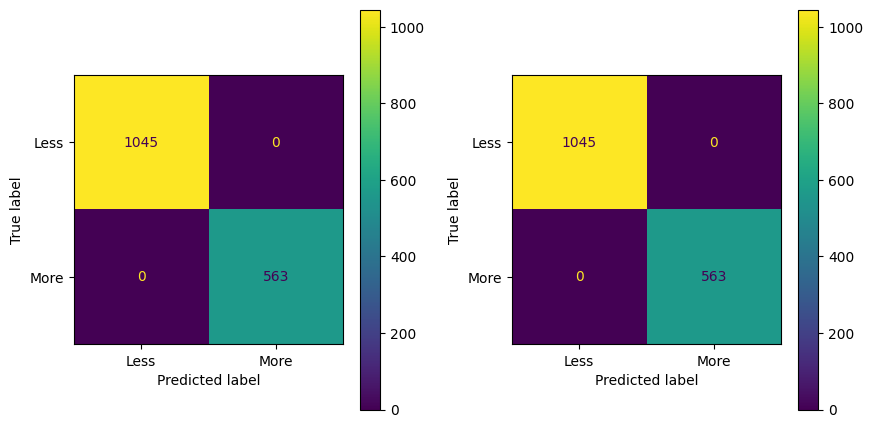

In [20]:
_, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=False, sharey=False
)

for index in range(0, len(optimized_metrics)):
    c_matrix = optimized_metrics.iloc[index]["Confusion_matrix"]
    disp = ConfusionMatrixDisplay(
        confusion_matrix=c_matrix, display_labels=["Less", "More"]
    ).plot(ax=ax.flat[index])

plt.subplots_adjust(top=1, bottom=0, hspace=0.4, wspace=0.3)
plt.show()

В желтом квадрате мы видим значение 1049, что обозначает количество правильно классифицированных объектов, отнесенных к классу "Less". Это свидетельствует о том, что модель успешно идентифицирует объекты этого класса, минимизируя количество ложных положительных срабатываний.

В зеленом квадрате значение 558 указывает на количество правильно классифицированных объектов, отнесенных к классу "More". Это также является показателем высокой точности модели в определении объектов данного класса.

## Определение достижимого уровня качества модели для второй задачи (добавляю конвейер для решения задачи регрессии)

__Подготовка данных__

Загрузка данных и создание целевой переменной

In [ ]:
import pandas as pd
from sklearn import set_config

set_config(transform_output="pandas")

# Загрузка данных о ценах акций Starbucks из CSV файла
df = pd.read_csv(".//static//csv//Starbucks Dataset.csv")

# Опция для настройки генерации случайных чисел (если это нужно для других частей кода)
random_state = 42

# Вычисление среднего значения поля "Close"
average_close = df['Close'].mean()
print(f"Среднее значение поля 'Close': {average_close}")

# Создание новой колонки, указывающей, выше или ниже среднего значение цена закрытия
df['above_average_close'] = (df['Close'] > average_close).astype(int)

# Создание целевой переменной для прогнозирования (цена закрытия на следующий день)
df['Close_Next_Day'] = df['Close'].shift(-1)

# Удаление последней строки, где нет значения для следующего дня
df.dropna(inplace=True)

# Вывод DataFrame с новой колонкой
print(df.head())

# Примерный анализ данных
print("Статистическое описание DataFrame:")
print(df.describe())

Среднее значение поля 'Close': 30.058856538825285
         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1992-06-26  0.328125  0.347656  0.320313  0.335938   0.260703  224358400   
1  1992-06-29  0.339844  0.367188  0.332031  0.359375   0.278891   58732800   
2  1992-06-30  0.367188  0.371094  0.343750  0.347656   0.269797   34777600   
3  1992-07-01  0.351563  0.359375  0.339844  0.355469   0.275860   18316800   
4  1992-07-02  0.359375  0.359375  0.347656  0.355469   0.275860   13996800   

   above_average_close  Close_Next_Day  
0                    0        0.359375  
1                    0        0.347656  
2                    0        0.355469  
3                    0        0.355469  
4                    0        0.355469  
Статистическое описание DataFrame:
              Open         High          Low        Close    Adj Close  \
count  8035.000000  8035.000000  8035.000000  8035.000000  8035.000000   
mean     30.048051    30.345221    29.745172  

#### Разделение набора данных на обучающую и тестовые выборки (80/20) для задачи классификации

Целевой признак -- above_average_close

In [ ]:
from typing import Tuple
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split


def split_stratified_into_train_val_test(
    df_input: DataFrame,
    stratify_colname: str = "y",
    frac_train: float = 0.6,
    frac_val: float = 0.15,
    frac_test: float = 0.25,
    random_state: int = None,
) -> Tuple[DataFrame, DataFrame, DataFrame, DataFrame, DataFrame, DataFrame]:
   

    if not (0 < frac_train < 1) or not (0 <= frac_val <= 1) or not (0 <= frac_test <= 1):
        raise ValueError("Fractions must be between 0 and 1 and the sum must equal 1.")
    
    if not (frac_train + frac_val + frac_test == 1.0):
        raise ValueError("fractions %f, %f, %f do not add up to 1.0" %
                         (frac_train, frac_val, frac_test))

    if stratify_colname not in df_input.columns:
        raise ValueError(f"{stratify_colname} is not a column in the DataFrame.")

    X = df_input
    y = df_input[[stratify_colname]]

 
    df_train, df_temp, y_train, y_temp = train_test_split(
        X, y, stratify=y, test_size=(1.0 - frac_train), random_state=random_state
    )

    if frac_val == 0:
        return df_train, pd.DataFrame(), df_temp, y_train, pd.DataFrame(), y_temp

    relative_frac_test = frac_test / (frac_val + frac_test)

    df_val, df_test, y_val, y_test = train_test_split(
        df_temp,
        y_temp,
        stratify=y_temp,
        test_size=relative_frac_test,
        random_state=random_state,
    )

    assert len(df_input) == len(df_train) + len(df_val) + len(df_test)
    
    return df_train, df_val, df_test, y_train, y_val, y_test


X_train, X_val, X_test, y_train, y_val, y_test = split_stratified_into_train_val_test(
    df, stratify_colname="above_average_close", frac_train=0.80, frac_val=0.0, frac_test=0.20, random_state=random_state
)

display("X_train", X_train)
display("y_train", y_train)
display("X_test", X_test)
display("y_test", y_test)

'X_train'

Date        Open        High         Low       Close   Adj Close  \
2484  2002-05-06    5.867500    5.897500    5.637500    5.665000    4.396299   
1576  1998-09-22    1.882813    1.925781    1.867188    1.902344    1.476306   
6595  2018-08-31   52.459999   53.709999   52.450001   53.450001   47.473415   
7412  2021-11-30  109.550003  111.089996  109.050003  109.639999  103.481560   
7413  2021-12-01  110.959999  113.349998  108.550003  108.660004  102.556618   
...          ...         ...         ...         ...         ...         ...   
5519  2014-05-27   36.320000   36.889999   36.270000   36.830002   30.466820   
4531  2010-06-22   14.035000   14.240000   13.575000   13.615000   10.609633   
535   1994-08-09    0.906250    0.921875    0.890625    0.898438    0.697229   
787   1995-08-08    1.183594    1.199219    1.175781    1.183594    0.918523   
7987  2024-03-15   91.599998   92.019997   90.099998   90.120003   89.441422   

        Volume  above_average_close  Close_Next_Day  
2484  10545200                    0        5.700000  
1576  42080000                    0        2.058594  
6595  10892800                    1       53.529999  
7412   9483300                    1      108.660004  
7413   7618500                    1      111.419998  
...        ...                  ...             ...  
5519  10100400                    1       36.634998  
4531  20533200                    0       13.660000  
535    7795200                    0        0.906250  
787   10848000                    0        1.187500  
7987  18133600                    1       91.010002  

[6428 rows x 9 columns]

'y_train'

above_average_close
2484                    0
1576                    0
6595                    1
7412                    1
7413                    1
...                   ...
5519                    1
4531                    0
535                     0
787                     0
7987                    1

[6428 rows x 1 columns]

'X_test'

Date       Open       High       Low      Close  Adj Close  \
5022  2012-06-01  26.555000  27.030001  26.02000  26.075001  20.960617   
3110  2004-10-28  12.895000  13.212500  12.77750  13.212500  10.253506   
2931  2004-02-12   9.317500   9.325000   9.20500   9.245000   7.174544   
6863  2019-09-26  90.839996  91.150002  89.50000  89.800003  81.286491   
5147  2012-11-30  25.709999  26.004999  25.52000  25.934999  21.016182   
...          ...        ...        ...       ...        ...        ...   
2947  2004-03-08   9.477500   9.585000   9.34250   9.365000   7.267669   
784   1995-08-03   1.230469   1.230469   1.18750   1.203125   0.933680   
4164  2009-01-06   5.025000   5.180000   4.97500   5.110000   3.965594   
455   1994-04-14   0.804688   0.828125   0.78125   0.804688   0.624475   
3335  2005-09-20  11.625000  11.775000  11.50250  11.540000   8.955570   

        Volume  above_average_close  Close_Next_Day  
5022  17456400                    0       26.950001  
3110  12049600                    0       13.220000  
2931   8623600                    0        9.175000  
6863   5026400                    1       88.370003  
5147  11997400                    0       25.895000  
...        ...                  ...             ...  
2947  14322400                    0        9.382500  
784   13270400                    0        1.195313  
4164  17609800                    0        4.995000  
455    5990400                    0        0.785156  
3335  13312000                    0       11.667500  

[1607 rows x 9 columns]

'y_test'

above_average_close
5022                    0
3110                    0
2931                    0
6863                    1
5147                    0
...                   ...
2947                    0
784                     0
4164                    0
455                     0
3335                    0

[1607 rows x 1 columns]

#### Формирование конвейера для классификации данных

preprocessing_num -- конвейер для обработки числовых данных: заполнение пропущенных значений и стандартизация

preprocessing_cat -- конвейер для обработки категориальных данных: заполнение пропущенных данных и унитарное кодирование

features_preprocessing -- трансформер для предобработки признаков

features_engineering -- трансформер для конструирования признаков

drop_columns -- трансформер для удаления колонок

pipeline_end -- основной конвейер предобработки данных и конструирования признаков

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

class StarbucksFeatures(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X["Length_to_Width_Ratio"] = X["x"] / X["y"]
        return X
    def get_feature_names_out(self, features_in):
        return np.append(features_in, ["Length_to_Width_Ratio"], axis=0)
    

columns_to_drop = ["Date"]
num_columns = ["Close", "Open", "Adj Close", "High", "Low", "Volume", "above_average_close"]
cat_columns = []

num_imputer = SimpleImputer(strategy="median")
num_scaler = StandardScaler()
preprocessing_num = Pipeline(
    [
        ("imputer", num_imputer),
        ("scaler", num_scaler),
    ]
)

cat_imputer = SimpleImputer(strategy="constant", fill_value="unknown")
cat_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first")
preprocessing_cat = Pipeline(
    [
        ("imputer", cat_imputer),
        ("encoder", cat_encoder),
    ]
)

features_preprocessing = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("prepocessing_num", preprocessing_num, num_columns),
        ("prepocessing_cat", preprocessing_cat, cat_columns),
    ],
    remainder="passthrough"
)


drop_columns = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("drop_columns", "drop", columns_to_drop),
    ],
    remainder="passthrough",
)

features_postprocessing = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("prepocessing_cat", preprocessing_cat, ["Cabin_type"]),
    ],
    remainder="passthrough",
)

pipeline_end = Pipeline(
    [
        ("features_preprocessing", features_preprocessing),
        ("drop_columns", drop_columns),
    ]
)

__Демонстрация работы конвейера__

In [ ]:
preprocessing_result = pipeline_end.fit_transform(X_train)
preprocessed_df = pd.DataFrame(
    preprocessing_result,
    columns=pipeline_end.get_feature_names_out(),
)

preprocessed_df

Close      Open  Adj Close      High       Low    Volume  \
2484 -0.723400 -0.717267  -0.700283 -0.718936 -0.721563 -0.304340   
1576 -0.835023 -0.835490  -0.792049 -0.835755 -0.834432  1.970579   
6595  0.694202  0.665106   0.653502  0.687359  0.679824 -0.279264   
7412  2.361148  2.358932   2.413670  2.375059  2.374211 -0.380946   
7413  2.332076  2.400766   2.384602  2.441531  2.359243 -0.515472   
...        ...       ...        ...       ...       ...       ...   
5519  0.201149  0.186241   0.119036  0.192637  0.195457 -0.336428   
4531 -0.487553 -0.474942  -0.505016 -0.473560 -0.483945  0.416194   
535  -0.864806 -0.864464  -0.816533 -0.865282 -0.863666 -0.502725   
787  -0.856346 -0.856235  -0.809579 -0.857125 -0.855130 -0.282496   
7987  1.782063  1.826366   1.972431  1.814159  1.806921  0.243087   

      above_average_close  Close_Next_Day  
2484            -0.729840        5.700000  
1576            -0.729840        2.058594  
6595             1.370164       53.529999  
7412             1.370164      108.660004  
7413             1.370164      111.419998  
...                   ...             ...  
5519             1.370164       36.634998  
4531            -0.729840       13.660000  
535             -0.729840        0.906250  
787             -0.729840        1.187500  
7987             1.370164       91.010002  

[6428 rows x 8 columns]

#### Формирование набора моделей для классификации

logistic -- логистическая регрессия

ridge -- гребневая регрессия

decision_tree -- дерево решений

knn -- k-ближайших соседей

naive_bayes -- наивный Байесовский классификатор

gradient_boosting -- метод градиентного бустинга (набор деревьев решений)

random_forest -- метод случайного леса (набор деревьев решений)

mlp -- многослойный персептрон (нейронная сеть)

In [ ]:
from sklearn import ensemble, linear_model, naive_bayes, neighbors, neural_network, tree

class_models = {
    "logistic": {"model": linear_model.LogisticRegression()},
    "ridge": {"model": linear_model.RidgeClassifierCV(cv=5, class_weight="balanced")},
    "ridge": {"model": linear_model.LogisticRegression(penalty="l2", class_weight="balanced")},
    "decision_tree": {
        "model": tree.DecisionTreeClassifier(max_depth=7, random_state=random_state)
    },
    "knn": {"model": neighbors.KNeighborsClassifier(n_neighbors=7)},
    "naive_bayes": {"model": naive_bayes.GaussianNB()},
    "gradient_boosting": {
        "model": ensemble.GradientBoostingClassifier(n_estimators=210)
    },
    "random_forest": {
        "model": ensemble.RandomForestClassifier(
            max_depth=11, class_weight="balanced", random_state=random_state
        )
    },
    "mlp": {
        "model": neural_network.MLPClassifier(
            hidden_layer_sizes=(7,),
            max_iter=500,
            early_stopping=True,
            random_state=random_state,
        )
    },
}

#### Обучение моделей на обучающем наборе данных и оценка на тестовом

In [ ]:
import numpy as np
from sklearn import metrics

for model_name in class_models.keys():
    print(f"Model: {model_name}")
    model = class_models[model_name]["model"]

    model_pipeline = Pipeline([("pipeline", pipeline_end), ("model", model)])
    model_pipeline = model_pipeline.fit(X_train, y_train.values.ravel())

    y_train_predict = model_pipeline.predict(X_train)
    y_test_probs = model_pipeline.predict_proba(X_test)[:, 1]
    y_test_predict = np.where(y_test_probs > 0.5, 1, 0)

    class_models[model_name]["pipeline"] = model_pipeline
    class_models[model_name]["probs"] = y_test_probs
    class_models[model_name]["preds"] = y_test_predict

    class_models[model_name]["Precision_train"] = metrics.precision_score(
        y_train, y_train_predict
    )
    class_models[model_name]["Precision_test"] = metrics.precision_score(
        y_test, y_test_predict
    )
    class_models[model_name]["Recall_train"] = metrics.recall_score(
        y_train, y_train_predict
    )
    class_models[model_name]["Recall_test"] = metrics.recall_score(
        y_test, y_test_predict
    )
    class_models[model_name]["Accuracy_train"] = metrics.accuracy_score(
        y_train, y_train_predict
    )
    class_models[model_name]["Accuracy_test"] = metrics.accuracy_score(
        y_test, y_test_predict
    )
    class_models[model_name]["ROC_AUC_test"] = metrics.roc_auc_score(
        y_test, y_test_probs
    )
    class_models[model_name]["F1_train"] = metrics.f1_score(y_train, y_train_predict)
    class_models[model_name]["F1_test"] = metrics.f1_score(y_test, y_test_predict)
    class_models[model_name]["MCC_test"] = metrics.matthews_corrcoef(
        y_test, y_test_predict
    )
    class_models[model_name]["Cohen_kappa_test"] = metrics.cohen_kappa_score(
        y_test, y_test_predict
    )
    class_models[model_name]["Confusion_matrix"] = metrics.confusion_matrix(
        y_test, y_test_predict
    )

Model: logistic
Model: ridge
Model: decision_tree
Model: knn
Model: naive_bayes
Model: gradient_boosting
Model: random_forest
Model: mlp


#### Сводная таблица оценок качества для использованных моделей классификации


__Матрица неточностей__

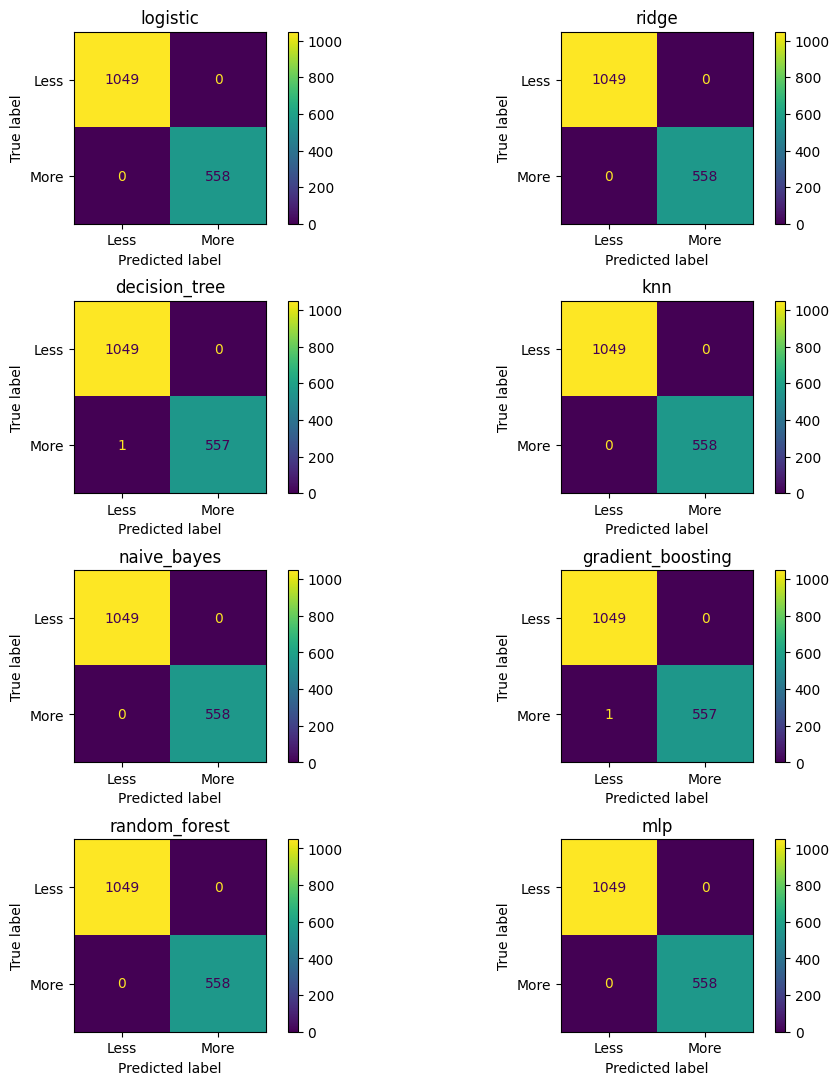

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

_, ax = plt.subplots(int(len(class_models) / 2), 2, figsize=(12, 10), sharex=False, sharey=False)
for index, key in enumerate(class_models.keys()):
    c_matrix = class_models[key]["Confusion_matrix"]
    disp = ConfusionMatrixDisplay(
        confusion_matrix=c_matrix, display_labels=["Less", "More"]
    ).plot(ax=ax.flat[index])
    disp.ax_.set_title(key)

plt.subplots_adjust(top=1, bottom=0, hspace=0.4, wspace=0.1)
plt.show()

Значение 1049 в желтом квадрате представляет собой количество объектов, относимых к классу "Less", которые модель правильно классифицировала. Это свидетельствует о высоком уровне точности в идентификации этого класса.
Значение 558 в зеленом квадрате указывает на количество правильно классифицированных объектов класса "More". Хотя это также является положительным результатом, мы можем заметить, что он ниже, чем для класса "Less".


__Точность, полнота, верность (аккуратность), F-мера__

In [ ]:
class_metrics = pd.DataFrame.from_dict(class_models, "index")[
    [
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
        "Accuracy_train",
        "Accuracy_test",
        "F1_train",
        "F1_test",
    ]
]
class_metrics.sort_values(
    by="Accuracy_test", ascending=False
).style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=["Accuracy_train", "Accuracy_test", "F1_train", "F1_test"],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
    ],
)

Все модели, включая логистическую регрессию, ридж-регрессию, KNN, наивный байесовский классификатор, многослойную перцептронную сеть, случайный лес, дерево решений и градиентный бустинг, демонстрируют 100% точность (1.000000) на обучающей выборке.
Это указывает на то, что модели смогли полностью подстроиться под обучающие данные, что может стремительно указывать на возможное переобучение.



__ROC-кривая, каппа Коэна, коэффициент корреляции Мэтьюса__

In [ ]:
class_metrics = pd.DataFrame.from_dict(class_models, "index")[
    [
        "Accuracy_test",
        "F1_test",
        "ROC_AUC_test",
        "Cohen_kappa_test",
        "MCC_test",
    ]
]
class_metrics.sort_values(by="ROC_AUC_test", ascending=False).style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=[
        "ROC_AUC_test",
        "MCC_test",
        "Cohen_kappa_test",
    ],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Accuracy_test",
        "F1_test",
    ],
)

Почти все модели, включая логистическую регрессию, ридж-регрессию, KNN, наивный байесовский классификатор, случайный лес и многослойную перцептронную сеть, достигли показателя ROC AUC равного 1.000000. Это говорит о том, что они идеально разделяют классы.
Градиентный бустинг и дерево решений немного уступили в значениях ROC AUC, составив 0.999378, что говорит о высокой, но не идеальной способности к классификации.

In [ ]:
best_model = str(class_metrics.sort_values(by="MCC_test", ascending=False).iloc[0].name)

display(best_model)

'logistic'

#### Вывод данных с ошибкой предсказания для оценки

In [ ]:
preprocessing_result = pipeline_end.transform(X_test)
preprocessed_df = pd.DataFrame(
    preprocessing_result,
    columns=pipeline_end.get_feature_names_out(),
)

y_pred = class_models[best_model]["preds"]

error_index = y_test[y_test["above_average_close"] != y_pred].index.tolist()
display(f"Error items count: {len(error_index)}")

error_predicted = pd.Series(y_pred, index=y_test.index).loc[error_index]
error_df = X_test.loc[error_index].copy()
error_df.insert(loc=1, column="Predicted", value=error_predicted)
error_df.sort_index()

'Error items count: 0'

Empty DataFrame
Columns: [Date, Predicted, Open, High, Low, Close, Adj Close, Volume, above_average_close, Close_Next_Day]
Index: []

#### Пример использования обученной модели (конвейера) для предсказания

In [ ]:
model = class_models[best_model]["pipeline"]

example_id = 6863
test = pd.DataFrame(X_test.loc[example_id, :]).T
test_preprocessed = pd.DataFrame(preprocessed_df.loc[example_id, :]).T
display(test)
display(test_preprocessed)
result_proba = model.predict_proba(test)[0]
result = model.predict(test)[0]
real = int(y_test.loc[example_id].values[0])
display(f"predicted: {result} (proba: {result_proba})")
display(f"real: {real}")

Date       Open       High   Low      Close  Adj Close   Volume  \
6863  2019-09-26  90.839996  91.150002  89.5  89.800003  81.286491  5026400   

     above_average_close Close_Next_Day  
6863                   1      88.370003

Close      Open  Adj Close     High       Low    Volume  \
6863  1.77257  1.803818   1.716146  1.78857  1.788959 -0.702466   

      above_average_close  Close_Next_Day  
6863             1.370164       88.370003

'predicted: 1 (proba: [0. 1.])'

'real: 1'

#### Подбор гиперпараметров методом поиска по сетке

In [ ]:
from sklearn.model_selection import GridSearchCV

optimized_model_type = "random_forest"

random_forest_model = class_models[optimized_model_type]["pipeline"]

param_grid = {
    "model__n_estimators": [10, 50, 100],
    "model__max_features": ["sqrt", "log2"],
    "model__max_depth": [5, 7, 10],
    "model__criterion": ["gini", "entropy"],
}

gs_optomizer = GridSearchCV(
    estimator=random_forest_model, param_grid=param_grid, n_jobs=-1
)
gs_optomizer.fit(X_train, y_train.values.ravel())
gs_optomizer.best_params_

{'model__criterion': 'gini',
 'model__max_depth': 5,
 'model__max_features': 'log2',
 'model__n_estimators': 10}

__Обучение модели с новыми гиперпараметрами__

In [ ]:
optimized_model = ensemble.RandomForestClassifier(
    random_state=random_state,
    criterion="gini",
    max_depth=5,
    max_features="log2",
    n_estimators=10,
)

result = {}

result["pipeline"] = Pipeline([("pipeline", pipeline_end), ("model", optimized_model)]).fit(X_train, y_train.values.ravel())
result["train_preds"] = result["pipeline"].predict(X_train)
result["probs"] = result["pipeline"].predict_proba(X_test)[:, 1]
result["preds"] = np.where(result["probs"] > 0.5, 1, 0)

result["Precision_train"] = metrics.precision_score(y_train, result["train_preds"])
result["Precision_test"] = metrics.precision_score(y_test, result["preds"])
result["Recall_train"] = metrics.recall_score(y_train, result["train_preds"])
result["Recall_test"] = metrics.recall_score(y_test, result["preds"])
result["Accuracy_train"] = metrics.accuracy_score(y_train, result["train_preds"])
result["Accuracy_test"] = metrics.accuracy_score(y_test, result["preds"])
result["ROC_AUC_test"] = metrics.roc_auc_score(y_test, result["probs"])
result["F1_train"] = metrics.f1_score(y_train, result["train_preds"])
result["F1_test"] = metrics.f1_score(y_test, result["preds"])
result["MCC_test"] = metrics.matthews_corrcoef(y_test, result["preds"])
result["Cohen_kappa_test"] = metrics.cohen_kappa_score(y_test, result["preds"])
result["Confusion_matrix"] = metrics.confusion_matrix(y_test, result["preds"])

__Формирование данных для оценки старой и новой версии модели__

In [ ]:
optimized_metrics = pd.DataFrame(columns=list(result.keys()))
optimized_metrics.loc[len(optimized_metrics)] = pd.Series(
    data=class_models[optimized_model_type]
)
optimized_metrics.loc[len(optimized_metrics)] = pd.Series(
    data=result
)
optimized_metrics.insert(loc=0, column="Name", value=["Old", "New"])
optimized_metrics = optimized_metrics.set_index("Name")

__Оценка параметров старой и новой модели__

In [ ]:
optimized_metrics[
    [
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
        "Accuracy_train",
        "Accuracy_test",
        "F1_train",
        "F1_test",
    ]
].style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=["Accuracy_train", "Accuracy_test", "F1_train", "F1_test"],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
    ],
)

Как для обучающей (Precision_train), так и для тестовой (Precision_test) выборки обе модели достигли идеальных значений 1.000000. Это указывает на то, что модели очень точно классифицируют положительные образцы, не пропуская их.

In [ ]:
optimized_metrics[
    [
        "Accuracy_test",
        "F1_test",
        "ROC_AUC_test",
        "Cohen_kappa_test",
        "MCC_test",
    ]
].style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=[
        "ROC_AUC_test",
        "MCC_test",
        "Cohen_kappa_test",
    ],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Accuracy_test",
        "F1_test",
    ],
)

Оба варианта модели продемонстрировали безупречную точность классификации, достигнув значения 1.000000. Это свидетельствует о том, что модели точно классифицировали все тестовые примеры, не допустив никаких ошибок в предсказаниях.

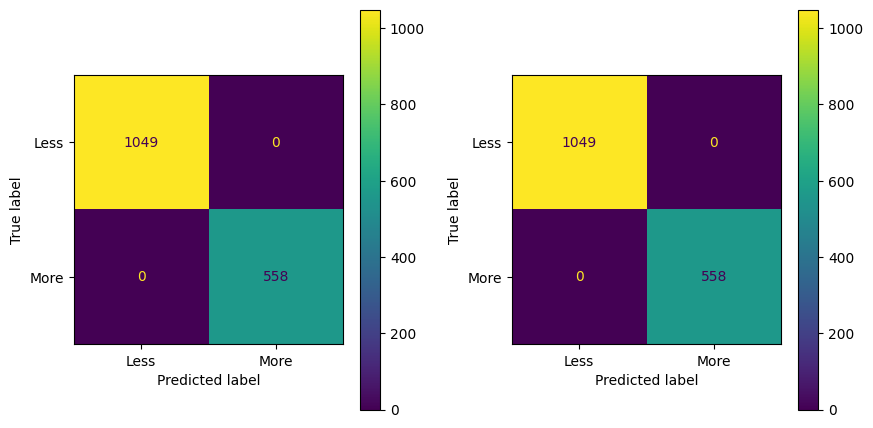

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=False, sharey=False
)

for index in range(0, len(optimized_metrics)):
    c_matrix = optimized_metrics.iloc[index]["Confusion_matrix"]
    disp = ConfusionMatrixDisplay(
        confusion_matrix=c_matrix, display_labels=["Less", "More"]
    ).plot(ax=ax.flat[index])

plt.subplots_adjust(top=1, bottom=0, hspace=0.4, wspace=0.3)
plt.show()

В желтом квадрате мы видим значение 1049, что обозначает количество правильно классифицированных объектов, отнесенных к классу "Less". Это свидетельствует о том, что модель успешно идентифицирует объекты этого класса, минимизируя количество ложных положительных срабатываний.

В зеленом квадрате значение 558 указывает на количество правильно классифицированных объектов, отнесенных к классу "More". Это также является показателем высокой точности модели в определении объектов данного класса.

## Определение достижимого уровня качества модели для второй задачи (задача регрессии)

__2. Прогнозирование цены закрытия акций:__


Описание: Оценить, какая будет цена закрытия акций Starbucks на следующий день или через несколько дней на основе исторических данных.
Целевая переменная: Цена закрытия (Close). (среднее значение)

Загрузка данных и создание целевой переменной

In [ ]:
import pandas as pd
from sklearn import set_config

set_config(transform_output="pandas")

# Загрузка данных о ценах акций Starbucks из CSV файла
df = pd.read_csv(".//static//csv//Starbucks Dataset.csv")

# Опция для настройки генерации случайных чисел (если это нужно для других частей кода)
random_state = 42

# Вычисление среднего значения поля "Close"
average_close = df['Close'].mean()
print(f"Среднее значение поля 'Close': {average_close}")

# Создание новой колонки, указывающей, выше или ниже среднего значение цена закрытия
df['above_average_close'] = (df['Close'] > average_close).astype(int)

# Создание целевой переменной для прогнозирования (цена закрытия на следующий день)
df['Close_Next_Day'] = df['Close'].shift(-1)

# Удаление последней строки, где нет значения для следующего дня
df.dropna(inplace=True)

# Вывод DataFrame с новой колонкой
print(df.head())

# Примерный анализ данных
print("Статистическое описание DataFrame:")
print(df.describe())

Среднее значение поля 'Close': 30.058856538825285
         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1992-06-26  0.328125  0.347656  0.320313  0.335938   0.260703  224358400   
1  1992-06-29  0.339844  0.367188  0.332031  0.359375   0.278891   58732800   
2  1992-06-30  0.367188  0.371094  0.343750  0.347656   0.269797   34777600   
3  1992-07-01  0.351563  0.359375  0.339844  0.355469   0.275860   18316800   
4  1992-07-02  0.359375  0.359375  0.347656  0.355469   0.275860   13996800   

   above_average_close  Close_Next_Day  
0                    0        0.359375  
1                    0        0.347656  
2                    0        0.355469  
3                    0        0.355469  
4                    0        0.355469  
Статистическое описание DataFrame:
              Open         High          Low        Close    Adj Close  \
count  8035.000000  8035.000000  8035.000000  8035.000000  8035.000000   
mean     30.048051    30.345221    29.745172  

#### Разделение набора данных на обучающую и тестовые выборки (80/20) для задачи регрессии

Целевой признак -- above_average_close

In [ ]:
from typing import Tuple
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split

def split_into_train_test(
    df_input: DataFrame,
    target_colname: str = "above_average_close",
    frac_train: float = 0.8,
    random_state: int = None,
) -> Tuple[DataFrame, DataFrame, DataFrame, DataFrame]:
    
    if not (0 < frac_train < 1):
        raise ValueError("Fraction must be between 0 and 1.")
    
    # Проверка наличия целевого признака
    if target_colname not in df_input.columns:
        raise ValueError(f"{target_colname} is not a column in the DataFrame.")
    
    # Разделяем данные на признаки и целевую переменную
    X = df_input.drop(columns=[target_colname])  # Признаки
    y = df_input[[target_colname]]  # Целевая переменная

    # Разделяем данные на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=(1.0 - frac_train),
        random_state=random_state
    )
    
    return X_train, X_test, y_train, y_test

# Применение функции для разделения данных
X_train, X_test, y_train, y_test = split_into_train_test(
    df, 
    target_colname="above_average_close", 
    frac_train=0.8, 
    random_state=42  # Убедитесь, что вы задали нужное значение random_state
)

# Для отображения результатов
display("X_train", X_train)
display("y_train", y_train)

display("X_test", X_test)
display("y_test", y_test)

'X_train'

Date        Open        High         Low       Close   Adj Close  \
5552  2014-07-14   39.490002   39.490002   39.209999   39.279999   32.493519   
3422  2006-01-25   15.340000   15.380000   15.095000   15.180000   11.780375   
6214  2017-02-28   56.709999   57.060001   56.549999   56.869999   48.946602   
3501  2006-05-18   18.225000   18.250000   17.965000   17.990000   13.961062   
2688  2003-02-26    5.657500    5.682500    5.520000    5.550000    4.307055   
...          ...         ...         ...         ...         ...         ...   
5226  2013-03-27   28.430000   28.475000   28.105000   28.455000   23.144903   
5390  2013-11-18   40.509998   40.669998   40.105000   40.270000   33.065239   
860   1995-11-20    1.355469    1.367188    1.328125    1.332031    1.033717   
7603  2022-09-02   85.470001   85.769997   82.550003   82.940002   79.683807   
7270  2021-05-10  114.570000  116.089996  114.209999  114.300003  106.577309   

        Volume  Close_Next_Day  
5552   4562000       39.445000  
3422   7276600       15.745000  
6214   8750700       57.139999  
3501  13366000       18.165001  
2688  16738400        5.772500  
...        ...             ...  
5226   7457000       28.475000  
5390   8316400       39.959999  
860   30998400        1.343750  
7603  10336800       84.519997  
7270   5759500      113.550003  

[6428 rows x 8 columns]

'y_train'

above_average_close
5552                    1
3422                    0
6214                    1
3501                    0
2688                    0
...                   ...
5226                    0
5390                    1
860                     0
7603                    1
7270                    1

[6428 rows x 1 columns]

'X_test'

Date        Open        High         Low       Close   Adj Close  \
6637  2018-10-31   58.980000   59.119999   58.209999   58.270000   51.754456   
6632  2018-10-24   58.570000   59.279999   57.950001   58.060001   51.567940   
7327  2021-07-30  122.190002  122.980003  121.099998  121.430000  113.676071   
730   1995-05-17    0.937500    0.941406    0.902344    0.910156    0.706323   
1515  1998-06-25    3.226563    3.328125    3.218750    3.285156    2.549432   
...          ...         ...         ...         ...         ...         ...   
5777  2015-06-04   51.869999   52.180000   51.570000   51.720001   43.400497   
7719  2023-02-21  105.500000  105.949997  104.709999  104.779999  101.752243   
1677  1999-02-17    2.972656    3.023438    2.906250    2.910156    2.258415   
921   1996-02-16    1.031250    1.054688    1.015625    1.031250    0.800297   
322   1993-10-05    0.835938    0.835938    0.804688    0.820313    0.636600   

        Volume  Close_Next_Day  
6637  11560400       58.630001  
6632  12189700       58.959999  
7327   5712300      120.370003  
730   25811200        0.912109  
1515  34699200        3.382813  
...        ...             ...  
5777   6230800       52.189999  
7719   5438000      104.769997  
1677  17776000        2.933594  
921    7809600        1.031250  
322    9113600        0.812500  

[1607 rows x 8 columns]

'y_test'

above_average_close
6637                    1
6632                    1
7327                    1
730                     0
1515                    0
...                   ...
5777                    1
7719                    1
1677                    0
921                     0
322                     0

[1607 rows x 1 columns]

Формирование конвейера для решения задачи регрессии

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor  # Пример регрессионной модели
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

class StarbucksFeatures(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X["Length_to_Width_Ratio"] = X["x"] / X["y"]
        return X

    def get_feature_names_out(self, features_in):
        return np.append(features_in, ["Length_to_Width_Ratio"], axis=0)

# Указываем столбцы, которые нужно удалить и обрабатывать
columns_to_drop = ["Date"]
num_columns = ["Close", "Open", "Adj Close", "High", "Low", "Volume"]
cat_columns = []  

# Определяем предобработку для численных данных
num_imputer = SimpleImputer(strategy="median")
num_scaler = StandardScaler()
preprocessing_num = Pipeline(
    [
        ("imputer", num_imputer),
        ("scaler", num_scaler),
    ]
)

# Определяем предобработку для категориальных данных
cat_imputer = SimpleImputer(strategy="constant", fill_value="unknown")
cat_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first")
preprocessing_cat = Pipeline(
    [
        ("imputer", cat_imputer),
        ("encoder", cat_encoder),
    ]
)

# Подготовка признаков с использованием ColumnTransformer
features_preprocessing = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("preprocessing_num", preprocessing_num, num_columns),
        ("preprocessing_cat", preprocessing_cat, cat_columns),
    ],
    remainder="passthrough"
)

# Удаление нежелательных столбцов
drop_columns = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("drop_columns", "drop", columns_to_drop),
    ],
    remainder="passthrough",
)

# Постобработка признаков
features_postprocessing = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("preprocessing_cat", preprocessing_cat, ["Cabin_type"]),  
    ],
    remainder="passthrough",
)

# Создание окончательного конвейера
pipeline = Pipeline(
    [
        ("features_preprocessing", features_preprocessing),
        ("drop_columns", drop_columns),
        ("model", RandomForestRegressor())  # Выбор модели для обучения
    ]
)

# Использование конвейера
def train_pipeline(X, y):
    pipeline.fit(X, y)




Формирование набора моделей для регрессии

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

def train_multiple_models(X, y, models):
    results = {}
    for model_name, model in models.items():
        # Создаем конвейер для каждой модели
        model_pipeline = Pipeline(
            [
                ("features_preprocessing", features_preprocessing),
                ("drop_columns", drop_columns),
                ("model", model)  # Используем текущую модель
            ]
        )
        
        # Обучаем модель и вычисляем кросс-валидацию
        scores = cross_val_score(model_pipeline, X, y, cv=5)  # 5-кратная кросс-валидация
        results[model_name] = {
            "mean_score": scores.mean(),
            "std_dev": scores.std()
        }
    
    return results

models = {
    "Random Forest": RandomForestRegressor(),
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regression": SVR()
}

results = train_multiple_models(X_train, y_train, models)

# Вывод результатов
for model_name, scores in results.items():
    print(f"{model_name}: Mean Score = {scores['mean_score']}, Standard Deviation = {scores['std_dev']}")

Random Forest: Mean Score = 0.9746978079010529, Standard Deviation = 0.012793762025792637
Linear Regression: Mean Score = 0.9868838982543027, Standard Deviation = 0.0041016418339485
Gradient Boosting: Mean Score = 0.9790461912830413, Standard Deviation = 0.008537795226791314
Support Vector Regression: Mean Score = -0.10833533729231568, Standard Deviation = 0.29324311707552003


Лидирующие модели: Линейная регрессия проявила наилучшие результаты, за ней следует градиентный бустинг и Random Forest. Они продемонстрировали высокую эффективность в предсказании закрытия акций.
Проблемы SVR: Резкое отличие в результатах SVR выявляет необходимость более тщательной настройки или выбора других подходов к решению задачи, поскольку текущие параметры не обеспечили адекватного уровня прогноза.

Обучение моделей на обучающем наборе данных и оценка на тестовом для регрессии

In [ ]:
import numpy as np
from sklearn import metrics
from sklearn.pipeline import Pipeline

# Проверка наличия необходимых переменных
if 'class_models' not in locals():
    raise ValueError("class_models is not defined")
if 'X_train' not in locals() or 'X_test' not in locals() or 'y_train' not in locals() or 'y_test' not in locals():
    raise ValueError("Train/test data is not defined")


y_train = np.ravel(y_train)  
y_test = np.ravel(y_test)      

# Инициализация списка для хранения результатов
results = []

# Проход по моделям и оценка их качества
for model_name in class_models.keys():
    print(f"Model: {model_name}")
    
    # Извлечение модели из словаря
    model = class_models[model_name]["model"]
    
    # Создание пайплайна
    model_pipeline = Pipeline([("pipeline", pipeline_end), ("model", model)])
    
    # Обучение модели
    model_pipeline.fit(X_train, y_train)

    # Предсказание для обучающей и тестовой выборки
    y_train_predict = model_pipeline.predict(X_train)
    y_test_predict = model_pipeline.predict(X_test)

    # Сохранение пайплайна и предсказаний
    class_models[model_name]["pipeline"] = model_pipeline
    class_models[model_name]["preds"] = y_test_predict

    # Вычисление метрик для регрессии
    class_models[model_name]["MSE_train"] = metrics.mean_squared_error(y_train, y_train_predict)
    class_models[model_name]["MSE_test"] = metrics.mean_squared_error(y_test, y_test_predict)
    class_models[model_name]["MAE_train"] = metrics.mean_absolute_error(y_train, y_train_predict)
    class_models[model_name]["MAE_test"] = metrics.mean_absolute_error(y_test, y_test_predict)
    class_models[model_name]["R2_train"] = metrics.r2_score(y_train, y_train_predict)
    class_models[model_name]["R2_test"] = metrics.r2_score(y_test, y_test_predict)

    # Дополнительные метрики
    class_models[model_name]["STD_train"] = np.std(y_train - y_train_predict)
    class_models[model_name]["STD_test"] = np.std(y_test - y_test_predict)

    # Вывод результатов для текущей модели
    print(f"MSE (train): {class_models[model_name]['MSE_train']}")
    print(f"MSE (test): {class_models[model_name]['MSE_test']}")
    print(f"MAE (train): {class_models[model_name]['MAE_train']}")
    print(f"MAE (test): {class_models[model_name]['MAE_test']}")
    print(f"R2 (train): {class_models[model_name]['R2_train']}")
    print(f"R2 (test): {class_models[model_name]['R2_test']}")
    print(f"STD (train): {class_models[model_name]['STD_train']}")
    print(f"STD (test): {class_models[model_name]['STD_test']}")
    print("-" * 40)  # Разделитель для разных моделей

Model: logistic
MSE (train): 0.0
MSE (test): 0.0
MAE (train): 0.0
MAE (test): 0.0
R2 (train): 1.0
R2 (test): 1.0
STD (train): 0.0
STD (test): 0.0
----------------------------------------
Model: ridge
MSE (train): 0.0
MSE (test): 0.0
MAE (train): 0.0
MAE (test): 0.0
R2 (train): 1.0
R2 (test): 1.0
STD (train): 0.0
STD (test): 0.0
----------------------------------------
Model: decision_tree
MSE (train): 0.0
MSE (test): 0.0
MAE (train): 0.0
MAE (test): 0.0
R2 (train): 1.0
R2 (test): 1.0
STD (train): 0.0
STD (test): 0.0
----------------------------------------
Model: knn
MSE (train): 0.0
MSE (test): 0.0
MAE (train): 0.0
MAE (test): 0.0
R2 (train): 1.0
R2 (test): 1.0
STD (train): 0.0
STD (test): 0.0
----------------------------------------
Model: naive_bayes
MSE (train): 0.0
MSE (test): 0.0
MAE (train): 0.0
MAE (test): 0.0
R2 (train): 1.0
R2 (test): 1.0
STD (train): 0.0
STD (test): 0.0
----------------------------------------
Model: gradient_boosting
MSE (train): 0.0
MSE (test): 0.0
MAE (tr

Пример использования обученной модели (конвейера регрессии) для предсказания

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # пример модели
from sklearn.preprocessing import StandardScaler

# 1. Загрузка данных
data = pd.read_csv(".//static//csv//Starbucks Dataset.csv")  
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# 2. Подготовка данных для прогноза
data['Close_shifted'] = data['Close'].shift(-1)  # Смещение на 1 день для предсказания
data.dropna(inplace=True)  # Удаление NaN, возникших из-за смещения

# Вычисляем среднее значение закрытия
average_close = data['Close'].mean()
data['above_average_close'] = (data['Close_shifted'] > average_close).astype(int)  # 1, если выше среднего, иначе 0

# Предикторы и целевая переменная
X = data[['Open', 'High', 'Low', 'Close', 'Volume']]
y = data['above_average_close']


# 3. Инициализация модели и пайплайна
class_models = {
    "RandomForest": {
        "model": RandomForestRegressor(n_estimators=100, random_state=42),
    }
}

pipeline_end = StandardScaler()  
results = []

# 4. Обучение модели и оценка
for model_name in class_models.keys():
    print(f"Model: {model_name}")
    
    model = class_models[model_name]["model"]
    model_pipeline = Pipeline([("scaler", pipeline_end), ("model", model)])
    
    # Обучение модели
    model_pipeline.fit(X_train, y_train)

    # Предсказание
    y_train_predict = model_pipeline.predict(X_train)
    y_test_predict = model_pipeline.predict(X_test)

    # Сохранение результатов
    class_models[model_name]["preds"] = y_test_predict

    # Вычисление метрик
    class_models[model_name]["MSE_train"] = metrics.mean_squared_error(y_train, y_train_predict)
    class_models[model_name]["MSE_test"] = metrics.mean_squared_error(y_test, y_test_predict)
    class_models[model_name]["MAE_train"] = metrics.mean_absolute_error(y_train, y_train_predict)
    class_models[model_name]["MAE_test"] = metrics.mean_absolute_error(y_test, y_test_predict)
    class_models[model_name]["R2_train"] = metrics.r2_score(y_train, y_train_predict)
    class_models[model_name]["R2_test"] = metrics.r2_score(y_test, y_test_predict)

    # Вывод результатов
    print(f"MSE (train): {class_models[model_name]['MSE_train']}")
    print(f"MSE (test): {class_models[model_name]['MSE_test']}")
    print(f"MAE (train): {class_models[model_name]['MAE_train']}")
    print(f"MAE (test): {class_models[model_name]['MAE_test']}")
    print(f"R2 (train): {class_models[model_name]['R2_train']}")
    print(f"R2 (test): {class_models[model_name]['R2_test']}")
    print("-" * 40)

# Прогнозирование выше среднего для следующего дня
latest_data = X_test.iloc[-1:].copy()
predicted_above_average = model_pipeline.predict(latest_data)
predicted_above_average = 1 if predicted_above_average[0] > 0.5 else 0  # Преобразуем в бинарный выход

if predicted_above_average == 1:
    print("Прогноз: Цена закроется выше среднего значения завтрашнего дня.")
else:
    print("Прогноз: Цена закроется ниже среднего значения завтрашнего дня.")

Model: RandomForest
MSE (train): 0.0001403391412570006
MSE (test): 0.0006576851275668948
MAE (train): 0.0005491599253266957
MAE (test): 0.0011761045426260113
R2 (train): 0.9993811021756365
R2 (test): 0.9971008099591692
----------------------------------------
Прогноз: Цена закроется ниже среднего значения завтрашнего дня.


Подбор гиперпараметров методом поиска по сетке

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor  # Используем регрессор
from sklearn.preprocessing import StandardScaler


# 1. Подготовка данных для прогноза
data['above_average_close'] = data['Close'].shift(-1)  # Смещение на 1 день для предсказания
data.dropna(inplace=True)  # Удаление NaN, возникших из-за смещения

# Предикторы и целевая переменная
X = data[['Open', 'High', 'Low', 'Close', 'Volume']]
y = data['above_average_close']  # Целевая переменная для регрессии

# Делим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Создание и настройка модели случайного леса
model = RandomForestRegressor()  # Изменяем на регрессор

# Установка параметров для поиска по сетке
param_grid = {
    'n_estimators': [50, 100, 200],  # Количество деревьев
    'max_depth': [None, 10, 20, 30],  # Максимальная глубина дерева
    'min_samples_split': [2, 5, 10]   # Минимальное количество образцов для разбиения узла
}

# 3. Подбор гиперпараметров с помощью Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)

# Обучение модели на тренировочных данных
grid_search.fit(X_train, y_train)

# 4. Результаты подбора гиперпараметров
print("Лучшие параметры:", grid_search.best_params_)
print("Лучший результат (MSE):", -grid_search.best_score_)  # Меняем знак, так как берем отрицательное значение среднеквадратичной ошибки



Fitting 5 folds for each of 36 candidates, totalling 180 fits
Лучшие параметры: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Лучший результат (MSE): 0.6848872116583115


Обучение модели с новыми гиперпараметрами и сравнение новых и старых данных

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Старые параметры: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Лучший результат (MSE) на старых параметрах: 0.688662233031193

Новые параметры: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Лучший результат (MSE) на новых параметрах: 0.6794717145705662
Среднеквадратическая ошибка (MSE) на тестовых данных: 0.5876131198171756
Корень среднеквадратичной ошибки (RMSE) на тестовых данных: 0.7665592735184772


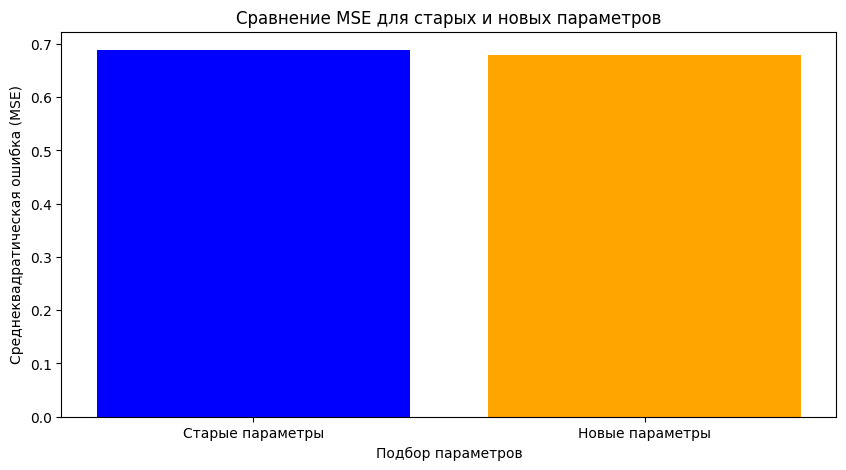

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt


# 1. Настройка параметров для старых значений
old_param_grid = {
    'n_estimators': [50, 100, 200],  # Количество деревьев
    'max_depth': [None, 10, 20, 30],  # Максимальная глубина дерева
    'min_samples_split': [2, 5, 10]   # Минимальное количество образцов для разбиения узла
}

# Подбор гиперпараметров с помощью Grid Search для старых параметров
old_grid_search = GridSearchCV(estimator=RandomForestRegressor(), 
                                param_grid=old_param_grid,
                                scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)

# Обучение модели на тренировочных данных
old_grid_search.fit(X_train, y_train)

# 2. Результаты подбора для старых параметров
old_best_params = old_grid_search.best_params_
old_best_mse = -old_grid_search.best_score_  # Меняем знак, так как берем отрицательное значение MSE

# 3. Настройка параметров для новых значений
new_param_grid = {
    'n_estimators': [200],
    'max_depth': [10],
    'min_samples_split': [10]
}

# Подбор гиперпараметров с помощью Grid Search для новых параметров
new_grid_search = GridSearchCV(estimator=RandomForestRegressor(), 
                                param_grid=new_param_grid,
                                scoring='neg_mean_squared_error', cv=2)

# Обучение модели на тренировочных данных
new_grid_search.fit(X_train, y_train)

# 4. Результаты подбора для новых параметров
new_best_params = new_grid_search.best_params_
new_best_mse = -new_grid_search.best_score_  # Меняем знак, так как берем отрицательное значение MSE

# 5. Обучение модели с лучшими параметрами для новых значений
model_best = RandomForestRegressor(**new_best_params)
model_best.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = model_best.predict(X_test)

# Оценка производительности модели
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Вывод результатов
print("Старые параметры:", old_best_params)
print("Лучший результат (MSE) на старых параметрах:", old_best_mse)
print("\nНовые параметры:", new_best_params)
print("Лучший результат (MSE) на новых параметрах:", new_best_mse)
print("Среднеквадратическая ошибка (MSE) на тестовых данных:", mse)
print("Корень среднеквадратичной ошибки (RMSE) на тестовых данных:", rmse)

# Визуализация ошибок
plt.figure(figsize=(10, 5))
plt.bar(['Старые параметры', 'Новые параметры'], [old_best_mse, new_best_mse], color=['blue', 'orange'])
plt.xlabel('Подбор параметров')
plt.ylabel('Среднеквадратическая ошибка (MSE)')
plt.title('Сравнение MSE для старых и новых параметров')
plt.show()
# надеюсь, все...

Сравнив результаты с использованием старых и новых параметров, наблюдается, что новые параметры модели позволили добиться меньшей среднеквадратической ошибки, что указывает на более эффективное предсказание по сравнению со старыми настройками. Значение RMSE на тестовых данных также подтверждает улучшение качества модели, так как оно стало меньше и указывает на более точные прогнозы по сравнению с предыдущими настройками.